# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [30]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [31]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\michael\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


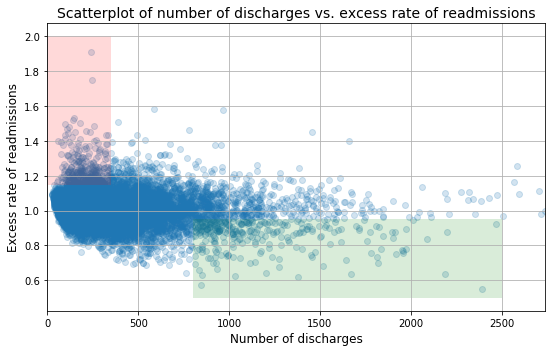

In [32]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
#### I do not agree with the above analysis and recomendations. While it is true that larger hospitals tend to have lower readmission rates, the difference in readminssion rates are not analyzed statistically in the paper. The claims stated above are not corroborated by the demonstration of a significant correlation between hospital capacity and readmission rates. Additionally, the entire analysis uses the excess readmission rate, which is calculated from the expected readmission rate, which could be incorrrect. Thus, the conclusions are based on unsound and absent calculations.

#### Looking at a Plot 1 below, which shows predicted readmission rates vs hospital capacity, we see that there are two groups of hospitals, those with a mean readmission rate of around 6 and those with a mean around 21. We see in this plot that both small and large hospitals fit into these groups.

#### Assuming that small hospitals are suffering from a lack of resources, the policy recommendations do not make any sense. By increasing demands on the small hospitals we will only further tax their limited resources. A better recomendation would be to provide additional resources or training without taxing them beyond their capacity. Also, the smaller facilities exist in regions of America that are sparcely populated. By consolidating these hospitals, we will only exacerbate the critical issue of poor access to healthcare in rural communities.

In [33]:
# remove the rows without data
clean_hospital_read_df=clean_hospital_read_df[clean_hospital_read_df["Number of Discharges"]!=0]

In [34]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013


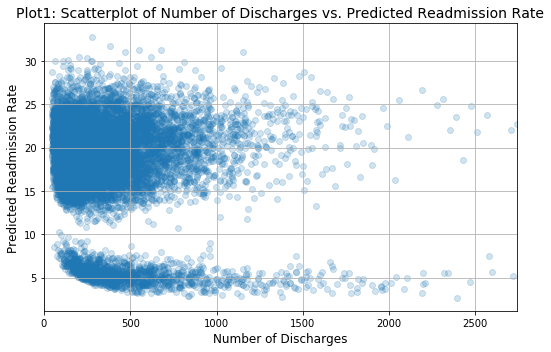

In [35]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Predicted Readmission Rate'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Predicted Readmission Rate', fontsize=12)
ax.set_title('Plot1: Scatterplot of Number of Discharges vs. Predicted Readmission Rate', fontsize=14)

ax.grid(True)
fig.tight_layout()

####      Look at the mean Readmission Rates of different groups. 

In [36]:
clean_hospital_read_df[clean_hospital_read_df["Number of Discharges"]<100]["Predicted Readmission Rate"].mean()

20.033922558922555

In [37]:
clean_hospital_read_df[(clean_hospital_read_df["Number of Discharges"]>100)&(clean_hospital_read_df["Number of Discharges"]<200)]["Predicted Readmission Rate"].mean()

18.554083147735707

In [38]:
clean_hospital_read_df[(clean_hospital_read_df["Number of Discharges"]>200)&(clean_hospital_read_df["Number of Discharges"]<900)]["Predicted Readmission Rate"].mean()

17.556973207820427

In [39]:
clean_hospital_read_df[(clean_hospital_read_df["Number of Discharges"]>900)&(clean_hospital_read_df["Number of Discharges"]<1500)]["Predicted Readmission Rate"].mean()

16.790403071017266

In [40]:
clean_hospital_read_df[(clean_hospital_read_df["Number of Discharges"]>1500)&(clean_hospital_read_df["Number of Discharges"]>1500)]["Predicted Readmission Rate"].mean()

14.206666666666667

## B-1 
#### Our null hypothesis is that the mean Excess Readmission Ratio of small hospitals and large hospitals are equal. We will test this with a t-test of independence. 

#### We create two data sets below to match what the paper uses for number of discharges being less than 100 and more than 1000. 

In [41]:
small= clean_hospital_read_df[(clean_hospital_read_df["Number of Discharges"]<100)][["Excess Readmission Ratio"]]
large= clean_hospital_read_df[(clean_hospital_read_df["Number of Discharges"]>1000)][["Excess Readmission Ratio"]]

## B-2
#### Manual calculation of p-score. 

In [42]:
small.count()

Excess Readmission Ratio    1188
dtype: int64

In [43]:
large.count()

Excess Readmission Ratio    463
dtype: int64

In [44]:
small.mean()

Excess Readmission Ratio    1.022618
dtype: float64

In [45]:
large.mean()

Excess Readmission Ratio    0.978335
dtype: float64

In [46]:
np.std(small)

Excess Readmission Ratio    0.057954
dtype: float64

In [47]:
np.std(large)

Excess Readmission Ratio    0.119878
dtype: float64

In [48]:
np.std(clean_hospital_read_df["Excess Readmission Ratio"])

0.09196026645631224

In [49]:
s2 = ((1187)*(0.057954*0.057954)+(462)*(0.119878*0.119878))/(1187+462)
s2

0.006443915218981201

In [50]:
s = np.sqrt(s2)
s

0.080274000890582259

In [51]:
t = (1.022618-0.978335)/(s*np.sqrt((1/1188)+(1/463)))
t

10.069022358440943

#### using built in functions, calculate t-statistic and p-score

In [52]:
from scipy.stats import ttest_ind

In [53]:
# use a built in t-test function for independence to get the p-value 
t,p = ttest_ind(small,large)
p 

array([  3.77875392e-23])

In [54]:
# we notice that we get the same t-statistic as in the manual method
t

array([ 10.0606204])

## B-3
### The p-value is 3.7*10^-23 which is much smaller than $\alpha$ = 0.01 , thus we reject the null hypothesis that the means are really the same. We have confirmed that there is a statistically significate difference between the mean excess readmission ratios of small and large hospitals. 

## B-4 
### While there is statistical significance between the readmission ratios of small and large hospitals, the practical significance is negligible. We can see that the variance of both small and large hospitals is quite high, so practically speaking the difference of a mean slightly above or below 1 does not indicate that an action needs to be taken. Furthermore, the mean is not a very good measure when there is high varience amoung the points for both the small and large hospitals. 
### I would recommend that the client focuses on the hospital sites that have a larger total predicted readmission rate regardless of the size of the hospitals. 

## B- 5  
### The advantage of the plot from the article is that it shows all the points and you can readily identify areas of interest in the data. Unfortuanately, this does not clearly indicate trends in the data. Below is a Plot2 with the data condensed and a trendline added to clarify the information.

In [55]:
# make a groupby for more legible plot
mean_p=clean_hospital_read_df.groupby("Number of Discharges")["Excess Readmission Ratio"].mean().reset_index() 

# resample the rows averaging over 15 points at a time. 
df_resampled = mean_p.groupby(lambda x:x//15).mean()

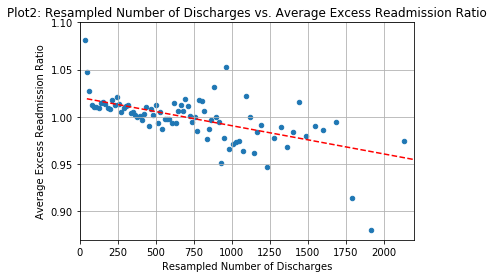

In [56]:
# create Plot2  here
df_resampled.plot(x="Number of Discharges",y="Excess Readmission Ratio", kind="scatter")
plt.xlim(0,2200)
plt.ylim(.87,1.1)
z = np.polyfit(df_resampled["Number of Discharges"],df_resampled["Excess Readmission Ratio"] , 1)
p = np.poly1d(z)
plt.xlabel('Resampled Number of Discharges')
plt.ylabel('Average Excess Readmission Ratio')
plt.title('Plot2: Resampled Number of Discharges vs. Average Excess Readmission Ratio')
plt.plot(x,p(x),"r--")
plt.grid(True)
plt.show()